In [23]:
import numpy as np

# Generate the innovations of the time series (an MxT)
M, T = 5, 250
procs = np.random.normal(size=(M,T))

# Introduce first-order AR dependence on the innovations
def make_ar(x):
    for i in range(1,len(x)):
        x[i] += 0.5 * x[i-1]

make_ar(procs[0])
for i in range(1,M):
    procs[i][1:] += 0.25 * procs[i-1][:-1] # Add a time-lagged dependence onto the observations
    make_ar(procs[i])

[Text(0.5, 69.0, 'Process'), Text(678.1249999999999, 0.5, 'Time')]

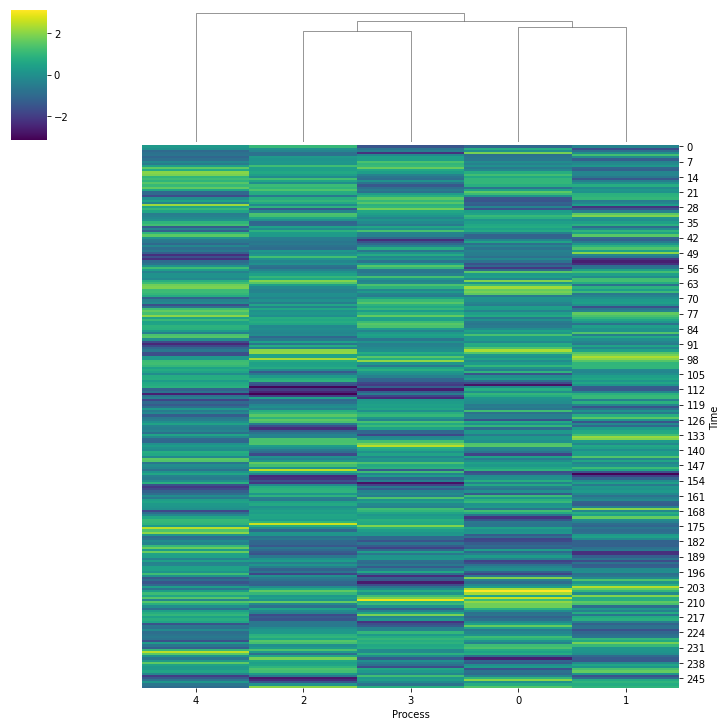

In [10]:
# Load the Data class
from pynats.data import Data
import seaborn as sns

#   - dim_order specifies processes is the first dimension and samples/observations are the second
#   - normalise z-scores the data
data = Data(procs, dim_order='ps', normalise=True)

dat = data.to_numpy(squeeze=True)

g = sns.clustermap(np.transpose(dat),
                    cmap='viridis', figsize=(10,10),
                    col_cluster=True, row_cluster=False)
ax_im = g.ax_heatmap

ax_im.set(xlabel='Process', ylabel='Time')

In [24]:
# Load the Calculator class
from pynats.calculator import Calculator

# Let's create an unnamed calculator
calc = Calculator(dataset=data,name='demo')

Loading configuration file: /home/oliver/Dropbox/Workspace/code/research/pynats/pynats/config.yaml
*** Importing module .correlation
[0] Adding measure .correlation.pearsonr(x,y,{'cov_estimator': 'empirical'})...
Succesfully initialised with identifier "pearsonr_empirical"
[1] Adding measure .correlation.pearsonr(x,y,{'cov_estimator': 'empirical', 'squared': True})...
Succesfully initialised with identifier "pearsonr-sq_empirical"
[2] Adding measure .correlation.pearsonr(x,y,{'cov_estimator': 'ledoit_wolf'})...
Succesfully initialised with identifier "pearsonr_ledoit_wolf"
[3] Adding measure .correlation.pearsonr(x,y,{'cov_estimator': 'shrunk'})...
Succesfully initialised with identifier "pearsonr_shrunk"
[4] Adding measure .correlation.pearsonr(x,y,{'cov_estimator': 'oas'})...
Succesfully initialised with identifier "pearsonr_oas"
[5] Adding measure .correlation.pcor(x,y,{'cov_estimator': 'empirical'})...
Succesfully initialised with identifier "pcorr_empirical"
[6] Adding measure .co

In [25]:
calc.compute()

Processing [demo: te_gaussian_k-1_kt-1_l-1_lt-1]: 100%|██████████| 91/91 [00:00<00:00, 559.23it/s]


In [26]:
# Should be an adjacency matrix of features x processes x processes
print(calc.adjacency.shape)

# Prune off any measures/processes that are mostly non-finite
calc.prune()

# Might have changed
print(calc.adjacency.shape)

(91, 0, 0)
Pruning:
	- Measures with more than 20.0% bad values, and
	- Processes with more than 80.0% bad values
Number of pairwise measures after pruning: 91
(91, 0, 0)


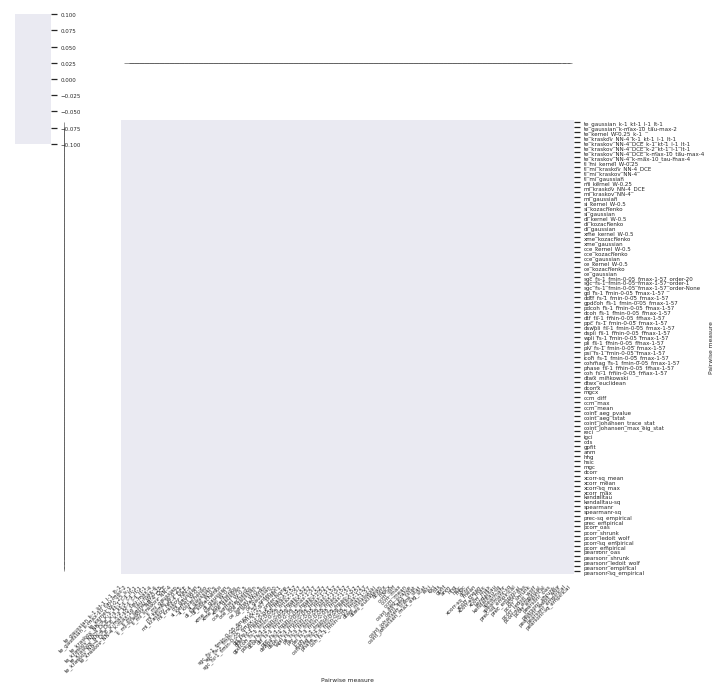

In [17]:
import matplotlib.pyplot as plt

# Correlate all the features
corrmat = calc.flatten().corr(method='spearman')

sns.set(font_scale=0.5)
g = sns.clustermap(corrmat.fillna(0), mask=corrmat.isna(),
                    center=0.0,
                    cmap='RdYlBu_r',
                    xticklabels=1, yticklabels=1 )

plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.show()

In [14]:
from pynats.calculator import CorrelationFrame

cf = CorrelationFrame(calc)

fm = cf.get_feature_matrix()

sns.heatmap(fm,cmap='RdYlBu_r',yticklabels=calc.n_measures)

plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity